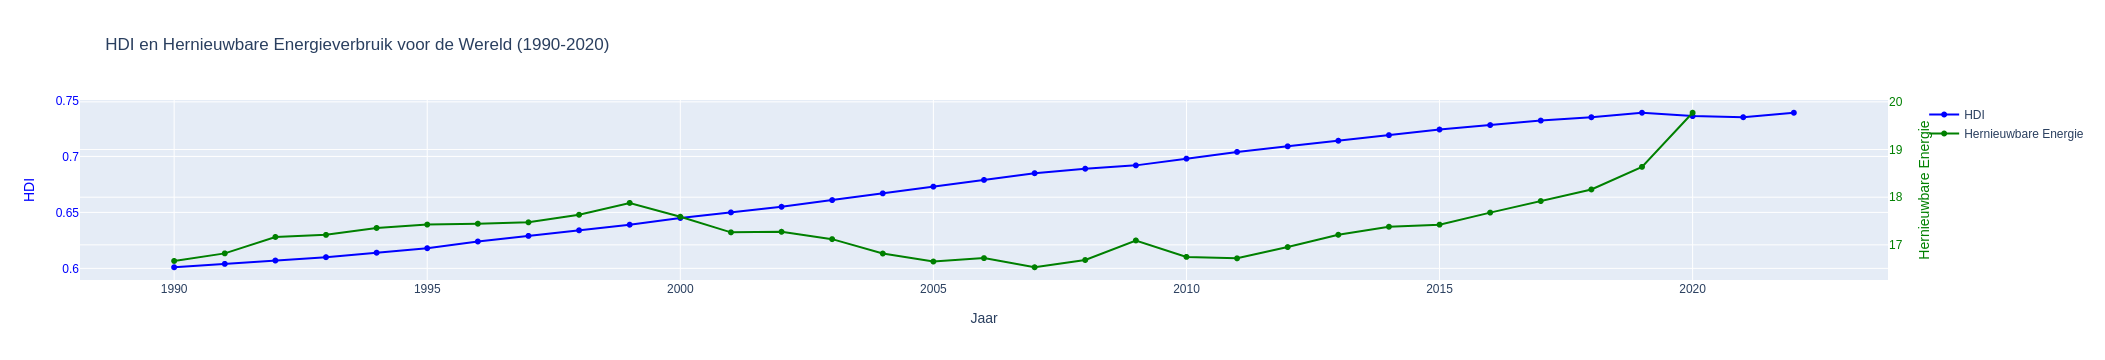

In [4]:
import pandas as pd
import plotly.graph_objs as go

# Stappen voor het aanmaken van voorbeelddata (ter illustratie)
df_renewable = pd.read_csv('../data/renewable_en.csv')
df_hdi = pd.read_csv('../data/hdi_py_cleaned.csv')

# Data extraheren voor "World" uit beide DataFrames
df_world_renewable = df_renewable[df_renewable['Country Name'] == 'World']
df_world_hdi = df_hdi[df_hdi['country'] == 'World']

# Kolommen hernoemen voor eenvoudiger samenvoegen
df_world_renewable = df_world_renewable.rename(columns=lambda x: x.split(' ')[0] if '[YR' in x else x)
df_world_hdi = df_world_hdi.rename(columns=lambda x: x.split('_')[1] if 'hdi_' in x else x)

# Alleen jaarkolommen en relevante identificatoren behouden
renewable_year_columns = [col for col in df_world_renewable.columns if col.isdigit()]
hdi_year_columns = [col for col in df_world_hdi.columns if col.isdigit()]

# Beide DataFrames omzetten naar lange indeling voor samenvoegen
df_world_renewable_long = df_world_renewable.melt(id_vars=['Country Name', 'Series Name'], value_vars=renewable_year_columns, var_name='Year', value_name='Renewable Energy')
df_world_hdi_long = df_world_hdi.melt(id_vars=['country'], value_vars=hdi_year_columns, var_name='Year', value_name='HDI')

# DataFrames samenvoegen op 'Year'
df_merged = pd.merge(df_world_renewable_long, df_world_hdi_long, on='Year')

# Onnodige kolommen filteren en NaN-waarden verwijderen
df_plot = df_merged[['Year', 'HDI', 'Renewable Energy']].dropna()

# Zorgen dat de datatypes correct zijn
df_plot['Year'] = df_plot['Year'].astype(int)
df_plot['HDI'] = pd.to_numeric(df_plot['HDI'], errors='coerce')
df_plot['Renewable Energy'] = pd.to_numeric(df_plot['Renewable Energy'], errors='coerce')

# Alleen de hoogste HDI-score per jaar behouden
df_plot = df_plot.loc[df_plot.groupby('Year')['HDI'].idxmax()]

# Plotting met Plotly
fig = go.Figure()

# HDI trace toevoegen
fig.add_trace(
    go.Scatter(x=df_plot['Year'], y=df_plot['HDI'], mode='markers+lines', name='HDI', line=dict(color='blue'))
)

# Renewable Energy trace toevoegen op secundaire y-as
fig.add_trace(
    go.Scatter(x=df_plot['Year'], y=df_plot['Renewable Energy'], mode='markers+lines', name='Hernieuwbare Energie', line=dict(color='green'), yaxis='y2')
)

# Lay-out bijwerken met titels en labels in het Nederlands
fig.update_layout(
    title='HDI en Hernieuwbare Energieverbruik voor de Wereld (1990-2020)',
    xaxis=dict(title='Jaar'),
    yaxis=dict(title='HDI', titlefont=dict(color='blue'), tickfont=dict(color='blue')),
    yaxis2=dict(title='Hernieuwbare Energie', titlefont=dict(color='green'), tickfont=dict(color='green'), overlaying='y', side='right')
)

# Plot weergeven
fig.show()
